# Modelo de Identificação de Fraudes

- Informações da base:
    - 'Time' (tempo): contém os segundos decorridos entre cada transação e a primeira transação no conjunto de dados. 
    - 'Amount' (valor): é o valor da transação 
    - 'Class' (classe): é a variável de resposta e assume valor 1 em caso de fraude e 0 caso contrário.
    - "Infelizmente, devido a questões de confidencialidade, não podemos fornecer os recursos originais e mais informações básicas sobre os dados. Características V1, V2, … V28 são os principais componentes obtidos com PCA"

In [1]:
# Importando o pandas

import pandas as pd

In [2]:
# Importando a base

base = pd.read_csv('creditcard.csv')

In [3]:
# Visualizando a base

base.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [4]:
# Verificando as informações

base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# E também o resumo estatístico

base.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.918649e-15  5.682686e-16 -8.761736e-15  2.811118e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552103e-15  2.040130e-15 -1.698953e-15 -1.893285e-16 -3.147640e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.473120e-16  8.042109e-16  5.282512e-16  4.456271e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   1.426896e-15  1.701640e-15 -3.662252e-16 -1.217809e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [6]:
# Verificando também se existem valores nulos

base.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

**Qual o percentual de transações que são fraudes?**

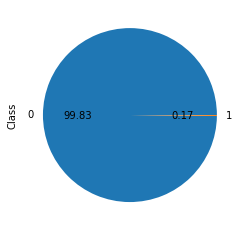

In [7]:
# Verificando visualmente o % de transações que são fraude

base.Class.value_counts().plot.pie(autopct='%.2f');

### <font color='red'>Criando um modelo de aprendizado de máquinas para identificar fraude
- Vamos criar um modelo para identificar fraude sem fazer nenhum tratamento nessa base. **Pois, como acabamos de ver no gráfico, o dataset está desbalanceado.**

In [8]:
# Separando X e y

X = base.drop('Class', axis=1)

y = base.Class

In [9]:
# Separando em treino e teste

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [10]:
# Verificando a distribuição das duas classes na base de treino e teste

y_train.value_counts()/y_train.shape[0]

0    0.998271
1    0.001729
Name: Class, dtype: float64

In [11]:
# Para a base de teste

y_test.value_counts()/y_test.shape[0]

0    0.998276
1    0.001724
Name: Class, dtype: float64

### OBSERVAÇÃO:
- **Podemos observar que há uma diferença na proporção entre y_train e y_test. Por isso, temos que usar o parâmetro STRATIFY para manter a proporção entre treino e teste**

### Vamos utilizar o algorítimo Decision Trees com o dataset desbalandeado para observação.

In [12]:
# Importando a árvore de decisão

from sklearn import tree

In [13]:
# Definindo o nosso classificador

clfTree = tree.DecisionTreeClassifier(random_state=42)

In [14]:
# Fazendo o fit para os dados de treino

clfTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [15]:
# Fazendo a previsão

y_pred = clfTree.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [16]:
# Importando a acurácia

from sklearn.metrics import accuracy_score

In [17]:
# Calculando a acurácia

accuracy_score(y_test, y_pred)

0.9991594582229457

**Verificando agora a matriz de confusão, a precisão e o recall**

In [18]:
# Importando a matriz de confusão

from sklearn.metrics import confusion_matrix

In [19]:
# Visualizando a matriz de confusão

confusion_matrix(y_test, y_pred)

array([[93786,    39],
       [   40,   122]], dtype=int64)

### OBSERVAÇÃO:
- **Podemos observar, pela matrix de confusão, que a fraude, ou seja o que é 1, acertamos 122 e erramos 40. O que é um erro muito alto.**

In [20]:
# Calculando a precisão

from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.7577639751552795

In [21]:
# E o recall

from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.7530864197530864

### OBSERVAÇÃO:
- **Podemos observar que, já que queremos detectar fraudes, ou seja o que é 1, precisamos melhorar a precisão e o recall.**

### <font color='red'>Criando um modelo de aprendizado de máquinas para identificar fraude - BALANCEANDO O DATASET

## Selecionando de forma aleatória

#### <font color='red'>Realizando o random undersampling

In [22]:
# Importando o RandomUnderSampler do imblearn

from imblearn.under_sampling import RandomUnderSampler

In [23]:
# Definindo o RandomUnderSampler

rus = RandomUnderSampler(random_state=42)

In [24]:
# Definindo a nova amostra

X_res, y_res = rus.fit_resample(X_train, y_train)

In [25]:
# Verificando a quantidade de valores de y

print('Quantidade de y:')
display(y.value_counts())

print('Quantidade de y_train:')
display(y_train.value_counts())

print('Quantidade de y_res:')
display(y_res.value_counts())

Quantidade de y:


0    284315
1       492
Name: Class, dtype: int64

Quantidade de y_train:


0    190490
1       330
Name: Class, dtype: int64

Quantidade de y_res:


0    330
1    330
Name: Class, dtype: int64

**Voltando ao algorítimo Decison Trees. Agora com o dataset balanceado.**

In [26]:
# Fazendo o fit para os dados de treino já balanceados

clfTree_RUS = tree.DecisionTreeClassifier(random_state=42)

clfTree_RUS.fit(X_res, y_res)

DecisionTreeClassifier(random_state=42)

In [27]:
# Fazendo a previsão para os dados de teste

y_pred_RUS = clfTree_RUS.predict(X_test)
y_pred_RUS

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [28]:
# Visualizando a matriz de confusão

confusion_matrix(y_test, y_pred_RUS)

array([[84484,  9341],
       [   15,   147]], dtype=int64)

In [29]:
# Calculando a acurácia

accuracy_score(y_test, y_pred_RUS)

0.9004543181503825

In [30]:
# Calculando a precisão

precision_score(y_test, y_pred_RUS)

0.015493254637436763

In [31]:
# Calculando o recall

recall_score(y_test, y_pred_RUS)

0.9074074074074074

#### <font color='red'>Realizando o random oversampling

In [32]:
# Importando

from imblearn.over_sampling import RandomOverSampler

In [33]:
# Definindo o ros

ros = RandomOverSampler(random_state=42, shrinkage=0.5)

In [34]:
# Refazendo nossa amostra

X_res, y_res = ros.fit_resample(X_train, y_train)

In [35]:
# Verificando a quantidade de valores de y

print('Quantidade de y:')
display(y.value_counts())

print('Quantidade de y_train:')
display(y_train.value_counts())

print('Quantidade de y_res:')
display(y_res.value_counts())

Quantidade de y:


0    284315
1       492
Name: Class, dtype: int64

Quantidade de y_train:


0    190490
1       330
Name: Class, dtype: int64

Quantidade de y_res:


0    190490
1    190490
Name: Class, dtype: int64

In [36]:
# Fazendo o fit para os dados de treino já balanceados

clfTree_ROS = tree.DecisionTreeClassifier(random_state=42)

clfTree_ROS.fit(X_res, y_res)

DecisionTreeClassifier(random_state=42)

In [37]:
# Fazendo a previsão para os dados de teste

y_pred_ROS = clfTree_ROS.predict(X_test)
y_pred_ROS

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [38]:
# Visualizando a matriz de confusão

confusion_matrix(y_test, y_pred_ROS)

array([[93109,   716],
       [   25,   137]], dtype=int64)

In [39]:
# Calculando a acurácia

accuracy_score(y_test, y_pred_ROS)

0.9921159309266175

In [40]:
# Calculando a precisão

precision_score(y_test, y_pred_ROS)

0.16060961313012895

In [41]:
# Calculando o recall

recall_score(y_test, y_pred_ROS)

0.845679012345679

## Usando outras formas de undersampling

#### <font color='red'>ClusterCentroids

In [42]:
# Importando o ClusterCentroids

from imblearn.under_sampling import ClusterCentroids

In [43]:
# Definindo

cc = ClusterCentroids(random_state=42)

In [44]:
# Criando a amostra dos dados

X_res, y_res = cc.fit_resample(X_train, y_train)

C:\Users\Flávio\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


**-> Gerando o modelo de classificação (Decision Trees) para o ClusterCentroids.**

In [45]:
# Fazendo o fit para os dados de treino já balanceados

clfTree_US_cc = tree.DecisionTreeClassifier(random_state=42)
clfTree_US_cc.fit(X_res, y_res)

# Fazendo a previsão para os dados de teste

y_pred_cc = clfTree_US_cc.predict(X_test)

# Visualizando a matriz de confusão

confusion_matrix(y_test, y_pred_cc)

array([[23192, 70633],
       [    3,   159]], dtype=int64)

#### <font color='red'>NearMiss

In [46]:
# Fazendo a reamostragem usando o NearMiss

from imblearn.under_sampling import NearMiss

nm = NearMiss()
X_res, y_res = nm.fit_resample(X_train, y_train)

**-> Gerando o modelo de classificação (Decision Trees) para o NearMiss.**

In [47]:
# Fazendo o fit para os dados de treino já balanceados

clfTree_US_nm = tree.DecisionTreeClassifier(random_state=42)
clfTree_US_nm.fit(X_res, y_res)

# Fazendo a previsão para os dados de teste

y_pred_nm = clfTree_US_nm.predict(X_test)

# Visualizando a matriz de confusão

confusion_matrix(y_test, y_pred_nm)

array([[50758, 43067],
       [    9,   153]], dtype=int64)

## E outras formas de oversampling

#### <font color='red'>Mudando os parâmetros do random oversampling

In [48]:
# Definindo o ros com shrinkage

ros = RandomOverSampler(random_state=42,shrinkage=0.9)

# Refazendo nossa amostra

X_res, y_res = ros.fit_resample(X_train, y_train)

In [49]:
# Fazendo o fit para os dados de treino já balanceados

clfTree_ROS2 = tree.DecisionTreeClassifier(random_state=42)
clfTree_ROS2.fit(X_res, y_res)

# Fazendo a previsão para os dados de teste

y_pred_ROS2 = clfTree_ROS2.predict(X_test)

# Visualizando a matriz de confusão

confusion_matrix(y_test, y_pred_ROS2)

array([[93355,   470],
       [   26,   136]], dtype=int64)

#### <font color='red'>SMOTE

In [50]:
# Utilizando o SMOTE

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

**-> Gerando o modelo de classificação (Decision Trees) para o SMOTE.**

In [51]:
# Fazendo o fit para os dados de treino já balanceados

clfTree_OS_SMOTE = tree.DecisionTreeClassifier(random_state=42)
clfTree_OS_SMOTE.fit(X_res, y_res)

# Fazendo a previsão para os dados de teste

y_pred_OS_SMOTE = clfTree_OS_SMOTE.predict(X_test)

# Visualizando a matriz de confusão

confusion_matrix(y_test, y_pred_OS_SMOTE)

array([[93650,   175],
       [   42,   120]], dtype=int64)

#### <font color='red'>ADASYN

In [52]:
# Utilizando ADASYN

from imblearn.over_sampling import ADASYN

ada = ADASYN(random_state=42)
X_res, y_res = ada.fit_resample(X_train, y_train)

**-> Gerando o modelo de classificação (Decision Trees) para o ADASYN.**

In [53]:
# Fazendo o fit para os dados de treino já balanceados

clfTree_OS_ADASYN = tree.DecisionTreeClassifier(random_state=42)
clfTree_OS_ADASYN.fit(X_res, y_res)

# Fazendo a previsão para os dados de teste

y_pred_OS_ADASYN = clfTree_OS_ADASYN.predict(X_test)

# Visualizando a matriz de confusão

confusion_matrix(y_test, y_pred_OS_ADASYN)

array([[93662,   163],
       [   38,   124]], dtype=int64)

## Combinando os métodos

In [54]:
# Utilizando o SMOTEENN

from imblearn.combine import SMOTEENN

sme = SMOTEENN(random_state=42)
X_res, y_res = sme.fit_resample(X_train, y_train)

**-> Gerando o modelo de classificação (Decision Trees) para o SMOTEENN.**

In [55]:
# Fazendo o fit para os dados de treino já balanceados

clfTree_SMOTEENN = tree.DecisionTreeClassifier(random_state=42)
clfTree_SMOTEENN.fit(X_res, y_res)

# Fazendo a previsão para os dados de teste

y_pred_SMOTEENN = clfTree_SMOTEENN.predict(X_test)

# Visualizando a matriz de confusão

confusion_matrix(y_test, y_pred_SMOTEENN)

array([[93629,   196],
       [   36,   126]], dtype=int64)